In [23]:
import pandas as pd 
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("C:\\Users\\USER\\Downloads\\Student_Performance.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df["Performance Index"].unique()

array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [7]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].astype("category").cat.codes

In [11]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [12]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities             int8
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [13]:
X = df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced']]   # Features
y = df['Performance Index']                                   # Target


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 5), (2500, 5), (7500,), (2500,))

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
dt = DecisionTreeRegressor()

In [20]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [21]:
dt.score(x_test,y_test)

0.9753523986964112

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5, 0.9166666666666666, 'x[1] <= 69.5\nsquared_error = 367.925\nsamples = 7500\nvalue = 55.222'),
 Text(0.25, 0.75, 'x[1] <= 53.5\nsquared_error = 135.393\nsamples = 3785\nvalue = 40.141'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[0] <= 4.5\nsquared_error = 77.642\nsamples = 1717\nvalue = 31.829'),
 Text(0.0625, 0.4166666666666667, 'x[1] <= 46.5\nsquared_error = 33.878\nsamples = 772\nvalue = 24.719'),
 Text(0.03125, 0.25, 'x[0] <= 2.5\nsquared_error = 19.892\nsamples = 378\nvalue = 20.915'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'x[0] <= 2.5\nsquared_error = 20.101\nsamples = 394\nvalue = 28.368'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'x[0] <= 7.5\nsquared_error = 38.362\nsamples = 945\nvalue = 37.637'),
 Text(0.15625, 0.25, 'x[1] <= 45.5\nsqu

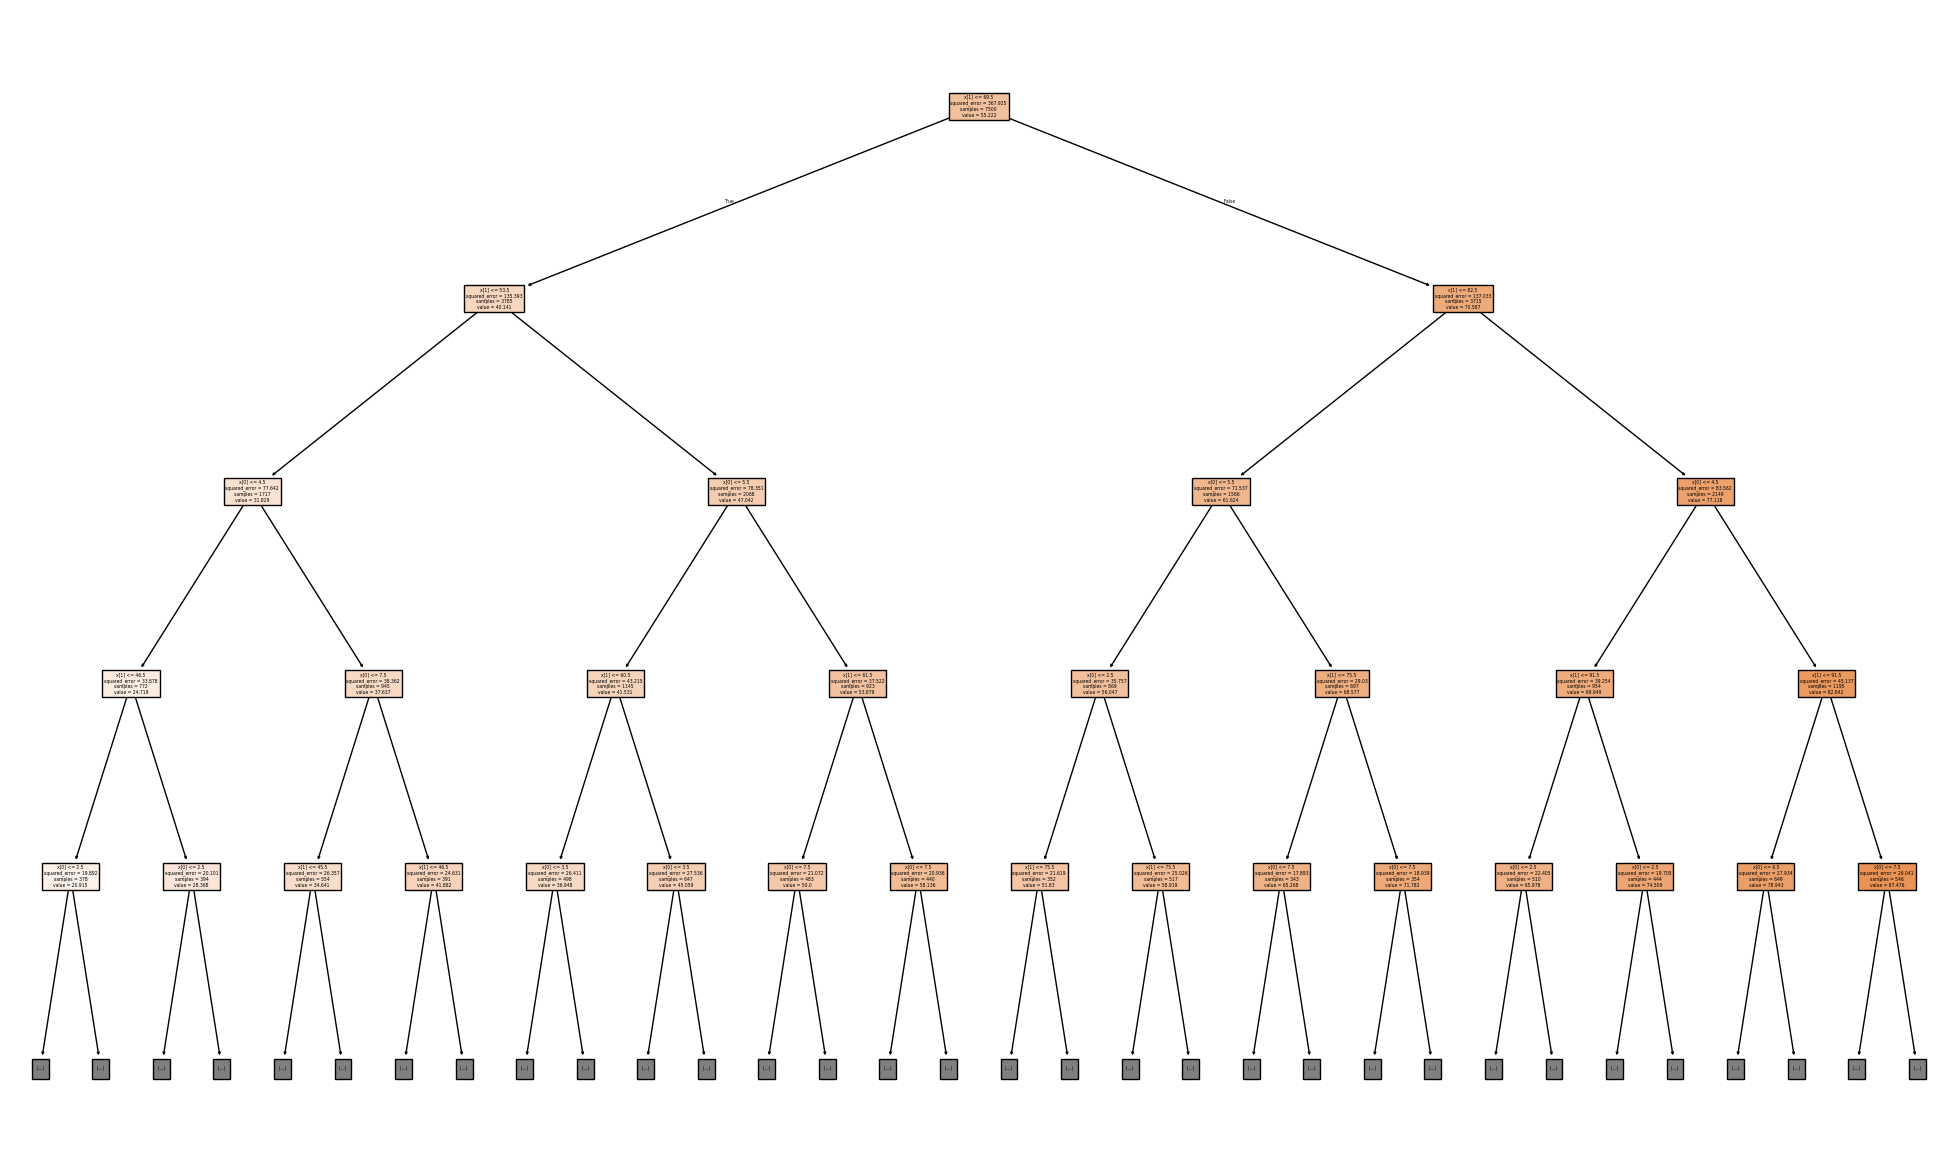

In [35]:
fig = plt.figure(figsize=(25,15))
#tree.plot_tree(dt, filled = True)             #before set depth
tree.plot_tree(dt, max_depth=4,filled=True)    #After set depth

In [42]:
fig.savefig("decistion_tree_regessor.png")

In [37]:
y_predict= dt.predict(x_test)

In [38]:
y_predict

array([44. , 84.5, 72. , ..., 47. , 34. , 56. ])

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 13.610743706972897
R² Score: 0.9634676855623602


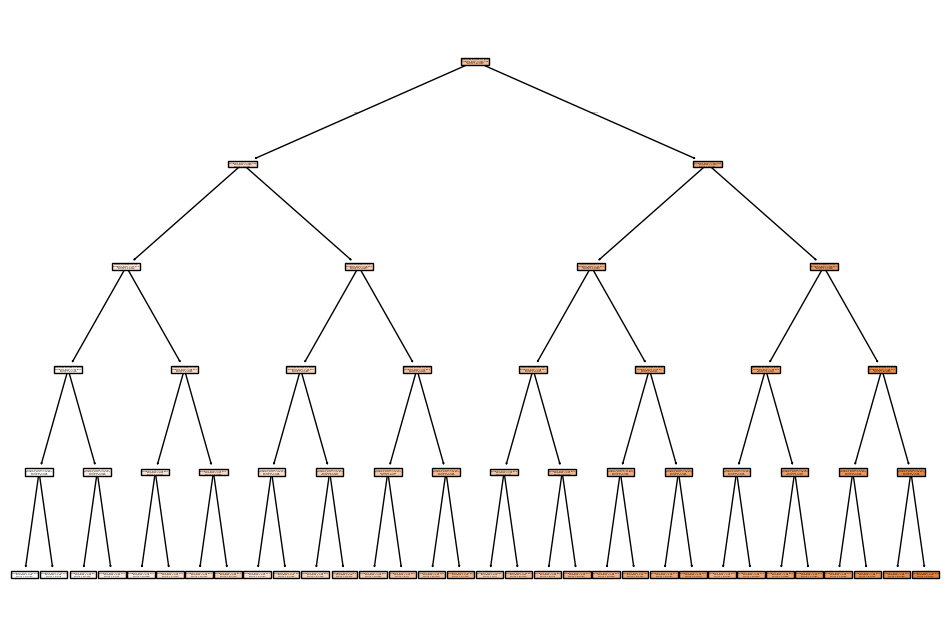

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=X.columns, filled=True)
plt.show()